# import lib

In [33]:
import pandas
import psycopg2
import configparser

# connect to db

In [34]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [35]:
cur=conn.cursor()

# q1

In [36]:
df_student=pandas.read_sql_query('select * from gp10.student',conn)
df_student[:]

,s_email,s_name,major
0,blackjt@jmu.edu,Jacob Black,Intel. Analysis
1,jed47@jmu.edu,Jane Doe,Philosophy
2,js25@jmu.edu,John Smith,Biology
3,kj12@jmu.edu,Kevin Johnson,Math


# q2

In [37]:
sql_q2 = """select gp10.professor.p_name,
gp10.course.c_name 
from gp10.professor
inner join gp10.course
on gp10.professor.p_email = course.p_email

"""

In [38]:
df_student=pandas.read_sql_query(sql_q2,conn)
df_student[:]

,p_name,c_name
0,Noel Hendrickson,Counter. Reason.
1,Christy Bradburn,Human Geography
2,Bob Johnson,intelligence
3,Bob Johnson,Seminar in IA
4,new_p,new_c_name
5,new_p,data mining


# q3

In [39]:
sql_q3 = """select c_number,
count(c_number) as enrolled
from gp10.enroll_list
group by c_number
order by enrolled desc

"""

<AxesSubplot:xlabel='c_number'>

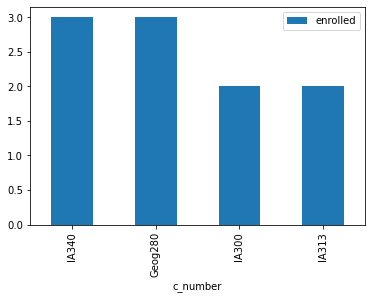

In [40]:
df_student=pandas.read_sql_query(sql_q3,conn)
df_student.plot.bar(y='enrolled', x= 'c_number')

# q4

In [41]:
sql_q4 = """
select gp10.professor.p_name,
count(gp10.course.c_name) as teaching_number
from gp10.professor
inner join gp10.course
on gp10.professor.p_email = gp10.course.p_email
group by professor.p_name
order by teaching_number desc
"""

<AxesSubplot:xlabel='p_name'>

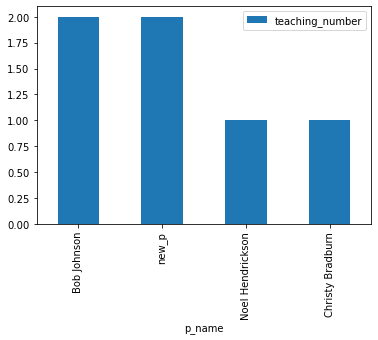

In [42]:
df_student=pandas.read_sql_query(sql_q4,conn)
df_student.plot.bar(y='teaching_number', x='p_name')

# q5

In [48]:
sql_q5_professor = """insert into gp10.professor(p_email,p_name,p_office)
values ('{}', '{}','{}')
""".format('new_p2@jmu.edu','new_p','new_office')

In [49]:
cur.execute(sql_q5_professor)

In [50]:
conn.commit()

In [51]:
df=pandas.read_sql_query('select * from gp10.professor',conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,Isat116
1,bradbucm@jmu.edu,Christy Bradburn,Isat127
2,b1@jmu.edu,Bob Johnson,Isat108
3,new_p@jmu.edu,new_p,new_office
4,new_p2@jmu.edu,new_p,new_office


In [52]:
sql_q5_course = """insert into gp10.course(c_number,c_name,c_room,p_email)
values('{}','{}','{}','{}')
""".format('ia_name2','new_c_name','online','new_p2@jmu.edu')

In [53]:
cur.execute(sql_q5_course)

In [54]:
conn.commit()

In [47]:
conn.rollback()

In [55]:
df=pandas.read_sql_query('select * from gp10.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA313,Counter. Reason.,Engeo 1204,hendrinx@jmu.edu
1,Geog280,Human Geography,Engeo1205,bradbucm@jmu.edu
2,IA299,intelligence,Isat159,b1@jmu.edu
3,IA300,Seminar in IA,Isat0150,b1@jmu.edu
4,ia_name,new_c_name,online,new_p@jmu.edu
5,IA340,data mining,Engeo 2010,new_p@jmu.edu
6,ia_name2,new_c_name,online,new_p2@jmu.edu


# q6

In [56]:
sql_q6_course = """update gp10.course
set p_email = '{}'
where p_email = '{}'
""".format('new_p@jmu.edu', 'weixx@jmu.edu')

In [57]:
cur.execute(sql_q6_course)

In [58]:
#cur.execute('ROLLBACK')

In [59]:
conn.commit()

In [60]:
df=pandas.read_sql_query('select * from gp10.course', conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA313,Counter. Reason.,Engeo 1204,hendrinx@jmu.edu
1,Geog280,Human Geography,Engeo1205,bradbucm@jmu.edu
2,IA299,intelligence,Isat159,b1@jmu.edu
3,IA300,Seminar in IA,Isat0150,b1@jmu.edu
4,ia_name,new_c_name,online,new_p@jmu.edu
5,IA340,data mining,Engeo 2010,new_p@jmu.edu
6,ia_name2,new_c_name,online,new_p2@jmu.edu


In [61]:
sql_q6_professor="""delete from gp10.professor
where p_email = '{}'
""".format('weixx@jmu.edu')

In [62]:
cur.execute(sql_q6_professor)

In [63]:
conn.commit()

In [64]:
df=pandas.read_sql_query('select * from gp10.professor', conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,Isat116
1,bradbucm@jmu.edu,Christy Bradburn,Isat127
2,b1@jmu.edu,Bob Johnson,Isat108
3,new_p@jmu.edu,new_p,new_office
4,new_p2@jmu.edu,new_p,new_office


In [65]:
cur.close()

In [66]:
conn.close()